<a href="https://colab.research.google.com/github/canetaba/NLP/blob/master/GPS_Position_Bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
!pip install PyDrive
!pip install iso8601

In [142]:
#Import modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [143]:
# Autenthicate and create the PyDrive client

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [144]:
# Get the file

#  TPV-cjrf-58.log
# id = 1zVPRM_1lxd8MgMoEpMP0J0gE193wqBmb

# TPV-bjfx-16.log
# 1yBBugnDzgykmugUstY3ZicIwQFnyhOpT



downloaded = drive.CreateFile({'id':"1yBBugnDzgykmugUstY3ZicIwQFnyhOpT"})
downloaded.GetContentFile('TPV-bjfx-16.log')

In [145]:
# Read data

import pandas as pd
import json
from pandas.io.json import json_normalize
import iso8601
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = 'TPV-bjfx-16.log'
#path = 'TPV_log.log'

data = pd.read_json(path,orient='records',lines=True)


In [146]:
# print datos
# print(data)
data

,class,device,mode,time,ept,lat,lon,alt,epx,epy,epv,speed,climb,eps,epc,track,ecefx,ecefy,ecefz,ecefvx,ecefvy,ecefvz,ecefpAcc,ecefvAcc,status,epd
0,TPV,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09T12:51:21.000Z,0.005,-33.447647,-70.653580,564.700,97.408,204.411,16.10,0.026,0.0,408.82,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TPV,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09T12:51:21.000Z,0.005,-33.447647,-70.653580,564.700,97.408,204.411,16.10,0.000,0.0,408.82,32.20,166.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TPV,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09T12:51:22.000Z,0.005,-33.447647,-70.653580,564.800,97.408,204.411,16.10,0.026,0.1,408.82,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TPV,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09T12:51:22.000Z,0.005,-33.447647,-70.653580,564.800,97.408,204.411,16.10,0.000,0.1,408.82,32.20,166.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TPV,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09T12:51:23.000Z,0.005,-33.447647,-70.653580,564.900,97.408,204.411,16.10,0.027,0.1,408.82,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208567,TPV,/dev/ttymxc1,3,2020-09-11T22:47:50.000Z,0.005,-33.601734,-70.683145,582.112,NaN,NaN,50.37,0.000,0.0,20.04,50.37,0.0,1759264.74,-5018937.92,-3510075.46,0.0,0.0,0.0,65700.50,20.04,NaN,NaN
208568,TPV,/dev/ttymxc1,3,2020-09-11T22:47:51.000Z,0.005,-33.601734,-70.683145,582.112,NaN,NaN,50.37,0.000,0.0,20.04,50.37,0.0,1759264.74,-5018937.92,-3510075.46,0.0,0.0,0.0,65735.47,20.04,NaN,NaN
208569,TPV,/dev/ttymxc1,3,2020-09-11T22:47:52.000Z,0.005,-33.601734,-70.683145,582.112,NaN,NaN,50.37,0.000,0.0,20.04,50.37,0.0,1759264.74,-5018937.92,-3510075.46,0.0,0.0,0.0,65770.44,20.04,NaN,NaN
208570,TPV,/dev/ttymxc1,3,2020-09-11T22:47:55.000Z,0.005,-33.601734,-70.683145,582.112,NaN,NaN,50.37,0.000,0.0,20.04,50.37,0.0,1759264.74,-5018937.92,-3510075.46,0.0,0.0,0.0,65875.35,20.04,NaN,NaN


In [147]:
# Almacena los datos en un dataframe

dataSimplified=pd.DataFrame(data,columns=['device','mode','time','lat','lon'])

# Convert iso8601 to datetime
dataSimplified['time'] = pd.to_datetime(dataSimplified['time']).dt.tz_convert(None)

# Show dataframe
print("total datos entre gps consola y router ", dataSimplified.shape)

# Intervalo de tiempo entre la primera y ultima medicion
print("tiempo minimo " , dataSimplified['time'].min())
print("tiempo maximo " , dataSimplified['time'].max())


total datos entre gps consola y router  (208572, 5)
tiempo minimo  2020-09-09 12:51:21
tiempo maximo  2020-09-11 22:47:56


In [148]:
# DATOS SIN PROCESAR DENTRO DE UNA SERIE 
# Almacena  los datos en una serie de tiempo
serie_datos = dataSimplified.set_index('device')['time']
serie_datos


device
gpsd://vm:2947#/dev/ttyS4   2020-09-09 12:51:21
gpsd://vm:2947#/dev/ttyS4   2020-09-09 12:51:21
gpsd://vm:2947#/dev/ttyS4   2020-09-09 12:51:22
gpsd://vm:2947#/dev/ttyS4   2020-09-09 12:51:22
gpsd://vm:2947#/dev/ttyS4   2020-09-09 12:51:23
                                    ...        
/dev/ttymxc1                2020-09-11 22:47:50
/dev/ttymxc1                2020-09-11 22:47:51
/dev/ttymxc1                2020-09-11 22:47:52
/dev/ttymxc1                2020-09-11 22:47:55
/dev/ttymxc1                2020-09-11 22:47:56
Name: time, Length: 208572, dtype: datetime64[ns]

In [149]:
# SERIE A DATAFRAME

dataSimplified2 = dataSimplified
dataSimplified2['time'] = pd.to_datetime(dataSimplified2['time'])
dataSimplified2
#print(dataSimplified2.groupby(pd.Grouper(key='time', freq="h")).mean())




,device,mode,time,lat,lon
0,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:21,-33.447647,-70.653580
1,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:21,-33.447647,-70.653580
2,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:22,-33.447647,-70.653580
3,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:22,-33.447647,-70.653580
4,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:23,-33.447647,-70.653580
...,...,...,...,...,...
208567,/dev/ttymxc1,3,2020-09-11 22:47:50,-33.601734,-70.683145
208568,/dev/ttymxc1,3,2020-09-11 22:47:51,-33.601734,-70.683145
208569,/dev/ttymxc1,3,2020-09-11 22:47:52,-33.601734,-70.683145
208570,/dev/ttymxc1,3,2020-09-11 22:47:55,-33.601734,-70.683145


In [150]:
# Rango de datos

             

In [151]:
# DATOS SIN PROCESAR

# Cuenta el numero de mediciones por dispositivo
cuenta_dispositivos = dataSimplified['device'].value_counts(sort=False)
print ("Numero de mediciones por dispositivo ", cuenta_dispositivos)

Numero de mediciones por dispositivo  gpsd://vm:2947#/dev/ttyS4    140150
/dev/ttymxc1                  68422
Name: device, dtype: int64


In [152]:
# Cuenta el numero de mode en 2  y 3 sin importar dispositivo
dataSimplified['mode'].value_counts(sort=False)

2        18
3    208554
Name: mode, dtype: int64

In [153]:
# Cuenta el numero de mode en 2  y 3 incluyendo el dispositivo
dataSimplified[['mode','device']].value_counts(sort=False)

mode  device                   
2     /dev/ttymxc1                     17
      gpsd://vm:2947#/dev/ttyS4         1
3     /dev/ttymxc1                  68405
      gpsd://vm:2947#/dev/ttyS4    140149
dtype: int64

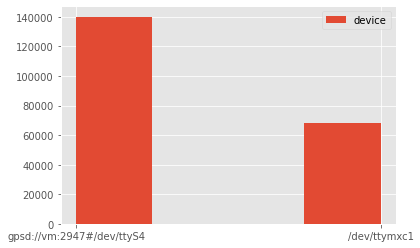

In [154]:
# plot a histogram
histogram1 = dataSimplified['device'].hist(bins=4, legend=True)

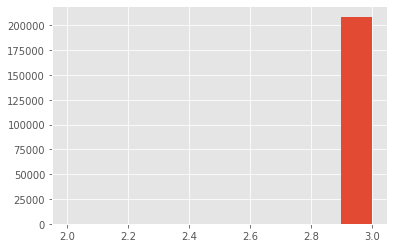

In [155]:
histogram2 = dataSimplified['mode'].hist()

In [156]:
# Separa los datos por dispositivo

# Router
data_router_simp =dataSimplified[dataSimplified['device'].str.contains("gpsd://vm:2947#/dev/ttyS4")]
data_router_simp.head(0)
print("datos del router sin procesar" , data_router_simp.shape)

# Separa los datos por dispositivo

# gps
data_gps_simp =dataSimplified[dataSimplified['device'].str.contains("/dev/ttymxc1")]
data_gps_simp.head(0)
print("datos del gps sin procesamiento" , data_gps_simp.shape)


datos del router sin procesar (140150, 5)
datos del gps sin procesamiento (68422, 5)


In [158]:
# Cuenta las mediciones del router de acuerdo al campo mode
data_router_simp['mode'].value_counts(sort=False)
print("mediciones del router de acuerdo al campo mode ", data_router_simp['mode'].value_counts(sort=False))

# Cuenta las mediciones de la consola por campo mode
data_gps_simp['mode'].value_counts(sort=False)
print("mediciones de la consola por campo mode " , data_gps_simp['mode'].value_counts(sort=False))

mediciones del router de acuerdo al campo mode  2         1
3    140149
Name: mode, dtype: int64
mediciones de la consola por campo mode  2       17
3    68405
Name: mode, dtype: int64


In [159]:
data_router_simp.head(10)

,device,mode,time,lat,lon
0,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:21,-33.447647,-70.653580
1,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:21,-33.447647,-70.653580
2,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:22,-33.447647,-70.653580
3,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:22,-33.447647,-70.653580
4,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:23,-33.447647,-70.653580
5,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:23,-33.447647,-70.653580
6,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:24,-33.447647,-70.653579
7,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:24,-33.447647,-70.653579
8,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:25,-33.447648,-70.653579
9,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:25,-33.447648,-70.653579


In [160]:
data_gps_simp.head(10)

,device,mode,time,lat,lon
16,/dev/ttymxc1,3,NaT,NaN,NaN
19,/dev/ttymxc1,2,2020-09-09 12:51:28,-33.447680,-70.653468
20,/dev/ttymxc1,3,2020-09-09 12:51:28,-33.447680,-70.653468
21,/dev/ttymxc1,3,2020-09-09 12:51:28,-33.447680,-70.653468
24,/dev/ttymxc1,3,2020-09-09 12:51:29,-33.447683,-70.653467
31,/dev/ttymxc1,3,2020-09-09 12:51:31,-33.447693,-70.653469
40,/dev/ttymxc1,3,2020-09-09 12:51:35,-33.447713,-70.653462
43,/dev/ttymxc1,3,2020-09-09 12:51:37,-33.447720,-70.653460
46,/dev/ttymxc1,3,2020-09-09 12:51:38,-33.447732,-70.653459
49,/dev/ttymxc1,3,2020-09-09 12:51:39,-33.447744,-70.653458


In [161]:
# Cuenta los duplicados del router 
dups_router = data_router_simp.duplicated(subset= 'time').sum()
print("Tamaño del dataframe router ", data_router_simp.shape)
print ("Cantidad de datos duplicados router", dups_router)
print("Hola datos no unicos", data_router_simp.groupby('time').nunique())

# Cuenta los duplicados de la consola
dups_gps = data_gps_simp.duplicated(subset= 'time').sum()

print("Tamaño del dataframe consola ", data_gps_simp.shape)
print ("Cantidad de datos duplicados consola ", dups_gps)
print("Hola datos no unicos ", data_gps_simp.groupby('time').nunique())


Tamaño del dataframe router  (140150, 5)
Cantidad de datos duplicados router 70074
Hola datos no unicos                      device  mode  lat  lon
time                                       
2020-09-09 12:51:21       1     1    1    1
2020-09-09 12:51:22       1     1    1    1
2020-09-09 12:51:23       1     1    1    1
2020-09-09 12:51:24       1     1    1    1
2020-09-09 12:51:25       1     1    1    1
...                     ...   ...  ...  ...
2020-09-11 19:25:50       1     1    1    1
2020-09-11 19:25:51       1     1    1    1
2020-09-11 19:25:52       1     1    1    1
2020-09-11 19:25:53       1     1    1    1
2020-09-11 19:25:54       1     1    1    1

[70076 rows x 4 columns]
Tamaño del dataframe consola  (68422, 5)
Cantidad de datos duplicados consola  199
Hola datos no unicos                       device  mode  lat  lon
time                                       
2020-09-09 12:51:28       1     2    1    1
2020-09-09 12:51:29       1     1    1    1
2020-09-09 12:51:

In [162]:
# Cuenta los NaN

# Router
router_nan_lat = data_router_simp[['lat','lon', 'time']].isna().sum()
print("NaN en router por latitud, longitud y time ", router_nan_lat)

# gps
gps_nan_lat = data_gps_simp[['lat','lon','time']].isna().sum()
print("NaN en consola por latitud y longitud  y time", gps_nan_lat)

NaN en router por latitud, longitud y time  lat     0
lon     0
time    0
dtype: int64
NaN en consola por latitud y longitud  y time lat     1
lon     1
time    1
dtype: int64


In [163]:
is_NaN = data_gps_simp.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data_gps_simp[row_has_NaN]
rows_with_NaN.head(10)


 

,device,mode,time,lat,lon
16,/dev/ttymxc1,3,NaT,NaN,NaN


In [164]:
# Estadisticas
data_router_simp.describe()
print("Estadisticas gps router" ,data_router_simp.describe())

data_gps_simp.describe()
print("Estadisticas gps consola", data_gps_simp.describe())



Estadisticas gps router                 mode            lat            lon
count  140150.000000  140150.000000  140150.000000
mean        2.999993     -33.511459     -70.667633
std         0.002671       0.069533       0.013691
min         2.000000     -33.604837     -70.715323
25%         3.000000     -33.584475     -70.679050
50%         3.000000     -33.513270     -70.666738
75%         3.000000     -33.445871     -70.655030
max         3.000000     -33.402338     -70.648061
Estadisticas gps consola                mode           lat           lon
count  68422.000000  68421.000000  68421.000000
mean       2.999752    -33.510447    -70.667722
std        0.015761      0.070093      0.013387
min        2.000000    -33.605437    -70.715579
25%        3.000000    -33.583006    -70.678826
50%        3.000000    -33.513176    -70.667494
75%        3.000000    -33.443436    -70.655243
max        3.000000    -33.402287    -70.647994


In [165]:

""" PREPROCESAMIENTO """

# ROUTER 
# Drop NaN de la tabla
cleanData_router = data_router_simp.dropna()
print("total datos ", cleanData_router.shape)
cleanData_router = cleanData_router.reset_index(drop = True)

# Sort by time, se ordenan los datos 
cleanData2_router= cleanData_router.sort_values(by='time')

# Elimina los duplicados
cleanData3_router = cleanData2_router.drop_duplicates(subset=['time'])
cleanData3_router.head(5)



total datos  (140150, 5)


,device,mode,time,lat,lon
0,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:21,-33.447647,-70.653580
2,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:22,-33.447647,-70.653580
4,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:23,-33.447647,-70.653580
6,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:24,-33.447647,-70.653579
8,gpsd://vm:2947#/dev/ttyS4,3,2020-09-09 12:51:25,-33.447648,-70.653579


In [166]:
""" PREPROCESAMIENTO """

# GPS
# Drop NaN de la tabla
cleanData_gps = data_gps_simp.dropna()
print("total datos ", cleanData_gps.shape)
cleanData_gps = cleanData_gps.reset_index(drop = True)

# Sort by time, se ordenan los datos 
cleanData2_gps= cleanData_gps.sort_values(by='time')

# Elimina los duplicados
cleanData3_gps = cleanData2_gps.drop_duplicates(subset=['time'])
cleanData3_gps.head(5)

total datos  (68421, 5)


,device,mode,time,lat,lon
0,/dev/ttymxc1,2,2020-09-09 12:51:28,-33.447680,-70.653468
3,/dev/ttymxc1,3,2020-09-09 12:51:29,-33.447683,-70.653467
4,/dev/ttymxc1,3,2020-09-09 12:51:31,-33.447693,-70.653469
5,/dev/ttymxc1,3,2020-09-09 12:51:35,-33.447713,-70.653462
6,/dev/ttymxc1,3,2020-09-09 12:51:37,-33.447720,-70.653460


In [167]:
# Tiempos  minimos y maximos mediciones

print("tiempo minimo Router" , cleanData3_router['time'].min())
print("tiempo maximo Router" , cleanData3_router['time'].max())

print("tiempo minimo Consola" , cleanData3_gps['time'].min())
print("tiempo maximo Consola" , cleanData3_gps['time'].max())



tiempo minimo Router 2020-09-09 12:51:21
tiempo maximo Router 2020-09-11 19:25:54
tiempo minimo Consola 2020-09-09 12:51:28
tiempo maximo Consola 2020-09-11 22:47:56


In [168]:
# Merge ambas tablas
frames = [cleanData3_router, cleanData3_gps] 
total_mediciones = pd.concat(frames)
total_mediciones1 = total_mediciones.sort_values(by=['time'])
total_mediciones1.shape



(138298, 5)

In [169]:
# Selecciona intervalos de tiempo para que muestre
# Promedio de datos adquiridos por gps cada 10 minutos
rango = 200

index = pd.date_range('9/9/2020 12:51:21',periods=rango, freq='10T')
series = pd.Series(range(rango), index=index)



In [170]:
# Separa los datos por dispositivo
data_router = cleanData3_router[cleanData3_router['device'].str.contains("gpsd://vm:2947#/dev/ttyS4")]
print("Mediciones del router ", data_router.shape)

data_gps = cleanData3_gps[cleanData3_gps['device'].str.contains('/dev/ttymxc1')]
print("Mediciones del gps ", data_gps.shape)



Mediciones del router  (70076, 5)
Mediciones del gps  (68222, 5)


In [171]:
# Cuenta los valores de mediciones por equipo
data_router[['mode','device']].value_counts(sort=True)
print("mediciones por router ", data_router[['mode','device']].value_counts(sort=False))


data_gps[['mode','device']].value_counts(sort=True)
print("mediciones por gps ", data_gps[['mode','device']].value_counts(sort=False))

mediciones por router  mode  device                   
2     gpsd://vm:2947#/dev/ttyS4        1
3     gpsd://vm:2947#/dev/ttyS4    70075
dtype: int64
mediciones por gps  mode  device      
2     /dev/ttymxc1       16
3     /dev/ttymxc1    68206
dtype: int64


In [172]:
# Tiempos minimos y maximos para determinar el intervalo de tiempo donde fueron tomados los posicionamientos
#ROUTER
router_time = data_router[['lat','lon','time']].diff()
hola = list(range(70076))
router_time.insert(1, 'contador', hola)
router_time[['contador','time']]

#GPS
gps_time = data_gps[['lat','lon','time']].diff()
hola1 = list(range(68222))
gps_time .insert(1, 'contador', hola1)
gps_time [['contador','time']]


,contador,time
0,0,NaT
3,1,0 days 00:00:01
4,2,0 days 00:00:02
5,3,0 days 00:00:04
6,4,0 days 00:00:02
...,...,...
68416,68217,0 days 00:00:01
68417,68218,0 days 00:00:01
68418,68219,0 days 00:00:01
68419,68220,0 days 00:00:03


In [173]:
print("Diferencia de tiempos del router ")
print(" ", router_time.sort_values(by= 'time', axis=0, ascending=False))

print('Tiempo minimo router ',router_time.min())
print('Tiempo máximo router', router_time.max())
print(" ")

print("Diferencia de tiempos del gps de la consola ")
print(" ", gps_time.sort_values(by= 'time', axis=0, ascending=False))

print('Tiempo minimo router ',gps_time.min())
print('Tiempo máximo router', gps_time.max())
print(" ")



Diferencia de tiempos del router 
                   lat  contador           lon            time
45951   6.554363e-02     22976  1.358313e-02 0 days 17:46:07
139300  1.445060e-01     69651  3.370458e-02 0 days 17:19:50
131638 -3.227800e-03     65820  9.404840e-04 0 days 00:00:30
16926   2.436000e-04      8463  4.156600e-05 0 days 00:00:04
60481   2.081670e-04     30241  7.376600e-05 0 days 00:00:04
...              ...       ...           ...             ...
46736  -5.983000e-06     23368  2.330000e-07 0 days 00:00:01
46737   2.816000e-06     23369  3.000000e-06 0 days 00:00:01
46739   2.317000e-06     23370  4.830000e-07 0 days 00:00:01
140148  1.500000e-07     70075 -8.340000e-07 0 days 00:00:01
0                NaN         0           NaN             NaT

[70076 rows x 4 columns]
Tiempo minimo router  lat              -0.0032278
contador                  0
lon            -0.000137233
time        0 days 00:00:01
dtype: object
Tiempo máximo router lat                0.144506
contador 

In [174]:
#router1 = router_time.sort_values(by='time', axis=0, ascending=False)

#router1.head(10)

gps1 = gps_time.sort_values(by='time', axis=0, ascending=False)
gps1.head(10)


,lat,contador,lon,time
19973,0.065127,19889,0.013704,0 days 17:46:14
57676,0.144960,57505,0.033644,0 days 17:20:17
32528,-0.000082,32420,0.000005,0 days 00:00:11
52490,0.000672,52342,0.000058,0 days 00:00:07
44826,0.000000,44681,0.000000,0 days 00:00:06
47774,-0.000027,47629,0.000002,0 days 00:00:06
34349,-0.000328,34239,0.000001,0 days 00:00:06
5192,-0.000024,5182,0.000007,0 days 00:00:05
52508,0.000107,52360,0.000020,0 days 00:00:05
52149,0.000451,51999,-0.000081,0 days 00:00:05


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f055daff9e8>],
      dtype=object)

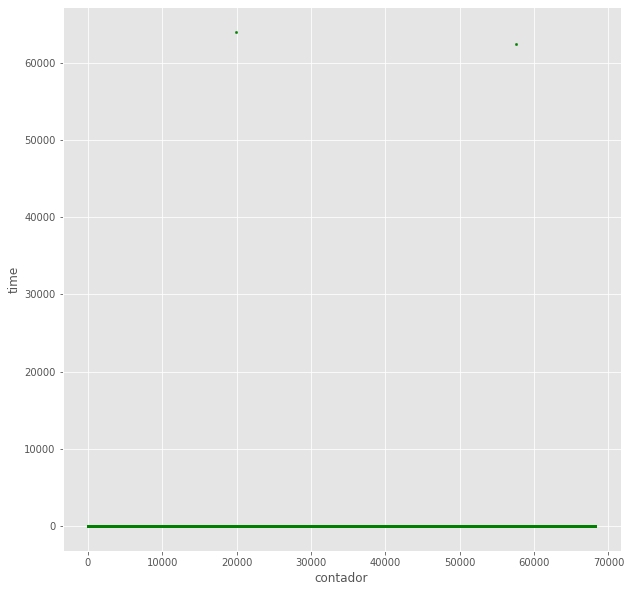

In [175]:
gps_time.dropna(how='any', inplace=True)
gps1 = gps_time.sort_values(by='contador', axis=0, ascending=True)

gps1['time'] = gps1['time'] /np.timedelta64(1, "s")

gps1.plot.scatter(x='contador',y='time', c= 'Green', marker='.', figsize =(10,10), grid= True,subplots=True,xlabel='contador',ylabel='tiempo', legend= True)



In [176]:
router_time.head(20)

,lat,contador,lon,time
0,NaN,0,NaN,NaT
2,-2.000000e-07,1,1.500000e-07,0 days 00:00:01
4,-2.000000e-07,2,1.670000e-07,0 days 00:00:01
6,-3.000000e-07,3,1.330000e-07,0 days 00:00:01
8,-3.330000e-07,4,2.000000e-07,0 days 00:00:01
10,-3.170000e-07,5,2.330000e-07,0 days 00:00:01
12,-2.330000e-07,6,1.840000e-07,0 days 00:00:01
15,-2.170000e-07,7,1.330000e-07,0 days 00:00:01
16,9.999999e-08,8,-6.700000e-08,0 days 00:00:01
18,1.170000e-07,9,-1.160000e-07,0 days 00:00:01


In [ ]:
print("Diferencia de tiempos de la consola ", gps_time.sort_values(by='time',ascending=False))
print('Tiempo minimo consola',gps_time.min())
print('Tiempo máximo consola', gps_time.max())
#hola1 = list(range(79350))
#data_gps.insert(1, 'contador', hola1)
#data_gps[['contador','time']]

In [178]:
# Selecciona un rango de tiempo para revisar las mediciones gps de la consola

min_time = '2020-09-10 12:55'
max_time = '2020-09-10 13:15'


# Todos los datos
total_mediciones1 = total_mediciones1.loc[(total_mediciones1['time'] >= min_time ) & (total_mediciones1['time'] <= max_time)]

# Selecciona un rango de tiempo para revisar las mediciones gps de la consola
data_gps1 = data_gps.loc[(data_gps['time'] >= min_time ) & (data_gps['time'] <= max_time)]

# Selecciona un rango de tiempo para revisar las mediciones gps del router
data_router1 = data_router.loc[(data_router['time'] >= min_time ) & (data_router['time'] <= max_time)]



In [ ]:
# total viajes con ambos GPS
total_mediciones1.plot.scatter(x='lat', y ='lon', c= 'Green', marker='.', figsize =(10,10), grid= True,subplots=True,xlabel='Latitud',ylabel='Longitud')

data_gps1.plot.scatter(x='lat', y ='lon', c= 'DarkBlue', marker='.', figsize =(10,10), grid= True,subplots=True,xlabel='Latitud',ylabel='Longitud')
# total viajes
data_router1.plot.scatter(x='lat', y ='lon',c= 'Orange', marker ='.', figsize =(10,10), grid= True,subplots=True,xlabel='Latitud',ylabel='Longitud')




In [180]:
# Library
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print(plt.style.available)

plt.style.use(['ggplot'])


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# Muestra un rango de tiempo para revisar las mediciones gps de la consola

min_time = '2020-09-09 12:55'
max_time = '2020-09-09 13:15'

fig1 =plt.figure(figsize=[10,10], dpi = 80)
plt.xlabel('latitud')
plt.ylabel('longitud')

ax1 = fig1.add_subplot(111)
plt.scatter(data_router1['lat'], data_router1['lon'], color='r', marker='o')
plt.scatter(data_gps1['lat'], data_gps1['lon'], color='g', marker='+')

plt.show()



In [182]:
from google.colab import files

# Exporta datos a csv
data_router.to_csv('bjfx-16-router.csv', header=True, sep=',')
files.download('bjfx-16-router.csv')
data_gps.to_csv('bjfx-16-gps.csv', header=True)
files.download('bjfx-16-gps.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [229]:
# Calculo de la distancia entre posiciones gps

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

# FORMULA PARA CALCULAR LA DISTANCIA ENTRE DOS PUNTOS GEOGRAFICOS

lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c * 1000

print("Result:", distance)
print("Should be:", 278545.58935106697, "m")


Result: 278545.58935106697
Should be: 278545.58935106697 m


In [305]:
# Generar un dataframe con 2 campos de lat y 2 de lon
import pandas as pd
pd.options.mode.chained_assignment = None

totalmediciones2 = total_mediciones[['lat','lon']]

lat1= totalmediciones2['lat'][1:].values.tolist()
lon1 = totalmediciones2['lon'][1:].values.tolist()

# Repito el ultimo valor para que la lista tenga el mismo tamaño del dataframe y poder hacer la diferencia para obtener la distancia entre puntos geograficos
lat1.append(-33.601734)
lon1.append(-70.683145)


# Para concatenar los dispositivos
disp= total_mediciones['device'].astype(str).values.tolist()
disp1= total_mediciones['device'][1:].astype(str).values.tolist()
disp1.append('/dev/ttymxc1')

zip_disp = zip(disp, disp1)
dispos = list(zip_disp)

dispos1=['{} {}'.format(x,y) for x,y in dispos]


# Para concatenar los tiempos
tiempo= total_mediciones['time'].astype(str).values.tolist()
tiempo1= total_mediciones['time'][1:].astype(str).values.tolist()
tiempo1.append('2020-09-11 22:47:56')

zip_tiempo = zip(tiempo, tiempo1)
times = list(zip_tiempo)

times1=['{} {}'.format(x,y) for x,y in times]


# Inserto las columnas lat1 y lon1 en el data frame.
totalmediciones2.insert(2,'lat1', lat1)
totalmediciones2.insert(3,'lon1', lon1)
totalmediciones2.insert(4,'devices', dispos1)
totalmediciones2.insert(5,'times', times1)



# Convierto las mediciones a radianes

totalmediciones2[['lat','lon','lat1','lon1']] = np.deg2rad(totalmediciones2[['lat','lon','lat1','lon1']])

# diferencia de lat y lon
dlat = totalmediciones2['lat1'] - totalmediciones2['lat']
dlon = totalmediciones2['lon1'] - totalmediciones2['lon']


# total de las mediciones
# approximate radius of earth in km
R = 6373.0



a= np.sin(dlat / 2)**2 + np.cos(totalmediciones2['lat']) * np.cos(totalmediciones2['lat1']) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

distance = R * c *1000

print(np.dtype(distance))

distancia = pd.DataFrame(distance, columns=['distancia'])
totalmediciones2 = totalmediciones2.join(distancia)
totalmediciones2.head(10)


float64


,lat,lon,lat1,lon1,devices,times,distancia
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.026243
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.361565
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.026243
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.361565
2,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:22.000 2020-09-09 12:51:23.000,0.027113
3,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:29.000 2020-09-09 12:51:31.000,1.061638
4,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:23.000 2020-09-09 12:51:24.000,0.035579
4,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:23.000 2020-09-09 12:51:24.000,2.324187
4,-0.583772,-1.233136,-0.583773,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:31.000 2020-09-09 12:51:35.000,0.035579
4,-0.583772,-1.233136,-0.583773,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:31.000 2020-09-09 12:51:35.000,2.324187


In [313]:
totalmediciones2.sort_values(by='distancia', ascending=False)


,lat,lon,lat1,lon1,devices,times,distancia
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.026243
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.361565
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.026243
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.361565
2,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:22.000 2020-09-09 12:51:23.000,0.027113
...,...,...,...,...,...,...,...
399,-0.584217,-1.233069,-0.584217,-1.233069,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:58:54.000 2020-09-09 12:58:55.000,2.271225
400,-0.583980,-1.233106,-0.583980,-1.233106,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:54:41.000 2020-09-09 12:54:42.000,0.033819
400,-0.583980,-1.233106,-0.583980,-1.233106,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:54:41.000 2020-09-09 12:54:42.000,2.253567
400,-0.584217,-1.233069,-0.584218,-1.233069,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:58:55.000 2020-09-09 12:58:56.000,0.033819


In [315]:
totalmediciones2.head(500)

,lat,lon,lat1,lon1,devices,times,distancia
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.026243
0,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:21.000 2020-09-09 12:51:22.000,0.361565
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.026243
0,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:28.000 2020-09-09 12:51:29.000,0.361565
2,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:22.000 2020-09-09 12:51:23.000,0.027113
3,-0.583772,-1.233136,-0.583772,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:29.000 2020-09-09 12:51:31.000,1.061638
4,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:23.000 2020-09-09 12:51:24.000,0.035579
4,-0.583772,-1.233138,-0.583772,-1.233138,gpsd://vm:2947#/dev/ttyS4 gpsd://vm:2947#/dev/...,2020-09-09 12:51:23.000 2020-09-09 12:51:24.000,2.324187
4,-0.583772,-1.233136,-0.583773,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:31.000 2020-09-09 12:51:35.000,0.035579
4,-0.583772,-1.233136,-0.583773,-1.233136,/dev/ttymxc1 /dev/ttymxc1,2020-09-09 12:51:31.000 2020-09-09 12:51:35.000,2.324187


,lat,lon
0,7.846472e-13,2.527555e-12
1,2.022294e-10,2.467333e-10
2,1.942503e-12,4.124780e-12
3,-2.617934e-12,-2.555021e-12
4,2.036274e-10,2.469882e-10
...,...,...
77482,-3.109858e-06,-6.556468e-06
77484,-3.109856e-06,-6.556467e-06
77486,-3.109855e-06,-6.556467e-06
77488,-3.109854e-06,-6.556466e-06
